# Lending Club Default Analysis

The analysis is divided into four main parts:
1. Data understanding 
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis 
4. Recommendations

In [1]:
import pandas as pd
import numpy as np

## Data Pull and Cleansing

In [2]:
df = pd.read_csv("D:/UPGRAD COURSE/Lending Case Study/loan_LC.csv")

C:\Users\91961\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Removing current ongoing loans as that dosent infer any conclusions fromour data analysis

In [5]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [6]:
df_loan = df[df.loan_status != "Current"]

In [7]:
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0 - Fully Paid Loans
1 - Charged off Loans

In [8]:
df_loan['default_status'] = df_loan.loan_status.apply(lambda x: 0 if x =="Fully Paid" else 1)

<ipython-input-8-1d3aa139abe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['default_status'] = df_loan.loan_status.apply(lambda x: 0 if x =="Fully Paid" else 1)


In [9]:
df_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
default_status                    0
Length: 112, dtype: int64

#### Removing the columns which have > 50% null values

In [10]:
variables= df_loan.columns[((df_loan.isnull().sum()/len(df_loan.index))*100 ) >50]

In [11]:
df_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
default_status                    0
Length: 112, dtype: int64

In [12]:
df_loan = df_loan.drop(variables,axis=1)

In [13]:
df_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12527
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Removing the below columns on basis of descriptive data,date columns and late-fee as this doesnt add any value to the our data analysis

In [14]:
df_loan.head().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 5
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5 non-null      int64  
 1   member_id                   5 non-null      int64  
 2   loan_amnt                   5 non-null      int64  
 3   funded_amnt                 5 non-null      int64  
 4   funded_amnt_inv             5 non-null      float64
 5   term                        5 non-null      object 
 6   int_rate                    5 non-null      object 
 7   installment                 5 non-null      float64
 8   grade                       5 non-null      object 
 9   sub_grade                   5 non-null      object 
 10  emp_title                   3 non-null      object 
 11  emp_length                  5 non-null      object 
 12  home_ownership              5 non-null      object 
 13  annual_inc                  5 non-null 

In [15]:
df_loan=df_loan.drop(columns=['emp_title','url','desc','last_pymnt_d','last_pymnt_d','last_pymnt_amnt',
                            'last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type','collections_12_mths_ex_med',
                            'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens',
                            'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                            'collection_recovery_fee','id','pymnt_plan','title','pub_rec_bankruptcies','collection_recovery_fee'])

In [16]:
df_loan=df_loan.drop(columns=['earliest_cr_line','inq_last_6mths','pub_rec','total_acc','initial_list_status'
                              ,'out_prncp', 'out_prncp_inv' ])

In [17]:
df_loan

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,open_acc,revol_bal,revol_util,default_status
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,Fully Paid,credit_card,860xx,AZ,27.65,0,3,13648,83.70%,0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,Charged Off,car,309xx,GA,1.00,0,3,1687,9.40%,1
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,Fully Paid,small_business,606xx,IL,8.72,0,2,2956,98.50%,0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,Fully Paid,other,917xx,CA,20.00,0,10,5598,21%,0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,...,Fully Paid,wedding,852xx,AZ,11.20,0,9,7963,28.30%,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,...,Fully Paid,home_improvement,802xx,CO,11.33,0,13,7274,13.10%,0
39713,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,...,Fully Paid,credit_card,274xx,NC,6.40,1,6,8847,26.90%,0
39714,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,...,Fully Paid,debt_consolidation,017xx,MA,2.30,0,11,9698,19.40%,0
39715,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,...,Fully Paid,other,208xx,MD,3.72,0,17,85607,0.70%,0


### Cleansed Data

In [18]:
df_loan.isnull().sum()

member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
delinq_2yrs               0
open_acc                  0
revol_bal                 0
revol_util               50
default_status            0
dtype: int64

### Extracting the numeric values from emp_length Column

In [19]:
df_loan['emp_length'] = df_loan['emp_length'].fillna(0)

In [20]:
import re
df_loan['emp_exp']=df_loan['emp_length'].apply(lambda x : re.findall('\d+',str(x))[0])

In [21]:
df_loan["emp_exp"] = df_loan["emp_exp"].apply(lambda x:int(x))
df_loan["emp_exp"].median()

4.0

#### Imputing Empty values with median value

In [22]:
df_loan["emp_exp"] = df_loan["emp_exp"].apply(lambda x:4.0 if x==0 else x)

In [23]:
df_loan["emp_exp"].isnull().sum()

0

#### Furthur data cleansing to extract numeric values from the  following mentioned columns

In [24]:
df_loan["int_rate"] = df_loan["int_rate"].apply(lambda x:float(x.split('%')[0]))
df_loan["term"] = df_loan["term"].apply(lambda x:int(x.split()[0]))
df_loan['year']= df_loan['issue_d'].apply(lambda x : "20"+x.split("-")[1])
df_loan['month']= df_loan['issue_d'].apply(lambda x : x.split("-")[0])

In [25]:
df_loan

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,addr_state,dti,delinq_2yrs,open_acc,revol_bal,revol_util,default_status,emp_exp,year,month
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,...,AZ,27.65,0,3,13648,83.70%,0,10.0,2011,Dec
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,...,GA,1.00,0,3,1687,9.40%,1,1.0,2011,Dec
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,...,IL,8.72,0,2,2956,98.50%,0,10.0,2011,Dec
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,...,CA,20.00,0,10,5598,21%,0,10.0,2011,Dec
5,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,...,AZ,11.20,0,9,7963,28.30%,0,3.0,2011,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,4 years,...,CO,11.33,0,13,7274,13.10%,0,4.0,2007,Jul
39713,90607,8500,8500,875.0,36,10.28,275.38,C,C1,3 years,...,NC,6.40,1,6,8847,26.90%,0,3.0,2007,Jul
39714,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,< 1 year,...,MA,2.30,0,11,9698,19.40%,0,1.0,2007,Jul
39715,89243,5000,5000,650.0,36,7.43,155.38,A,A2,< 1 year,...,MD,3.72,0,17,85607,0.70%,0,1.0,2007,Jul


In [26]:
df_loan['loan_number']=1
(df_loan.groupby('default_status')['loan_number'].sum()/sum(df_loan['loan_number']))*100

default_status
0    85.413588
1    14.586412
Name: loan_number, dtype: float64

## Analysis and Visualizations

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

#### Calculating % of defaulted loans

In [28]:
df_loan.default_status.value_counts()

0    32950
1     5627
Name: default_status, dtype: int64

In [29]:
df_loan.default_status.mean()

0.14586411592399617

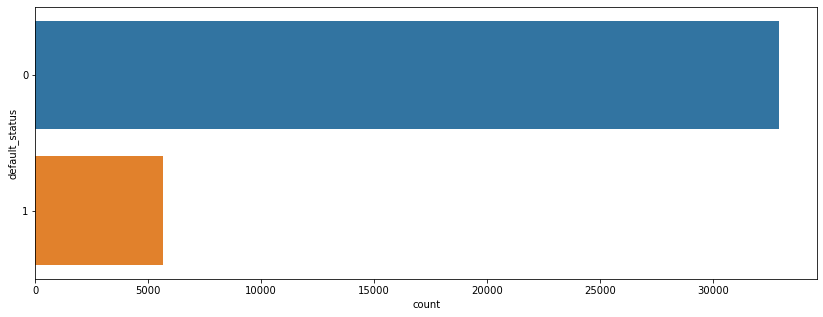

In [30]:
plt.figure(figsize=(14,5))
sns.countplot(y="default_status", data=df_loan)
plt.show()

### 14.6% of loans are Charged off loans

## Univariate Analysis

In [31]:
def plt_uni(uni_var):
    plt.figure(figsize=[6,4])
    sns.barplot(data=df_loan, x=uni_var, y="default_status")
    plt.show()

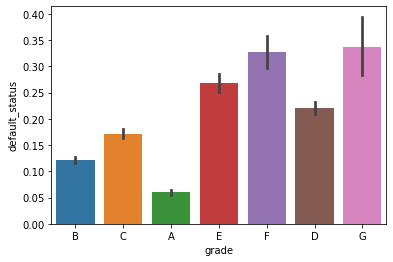

In [32]:
plt_uni("grade")

### 'Higher the Grade of the Loan , Higher is the risk of becoming defaulter'

In [33]:
(df_loan.groupby('grade')['default_status'].mean())*100

grade
A     5.993031
B    12.205567
C    17.194281
D    21.986234
E    26.849418
F    32.684426
G    33.779264
Name: default_status, dtype: float64

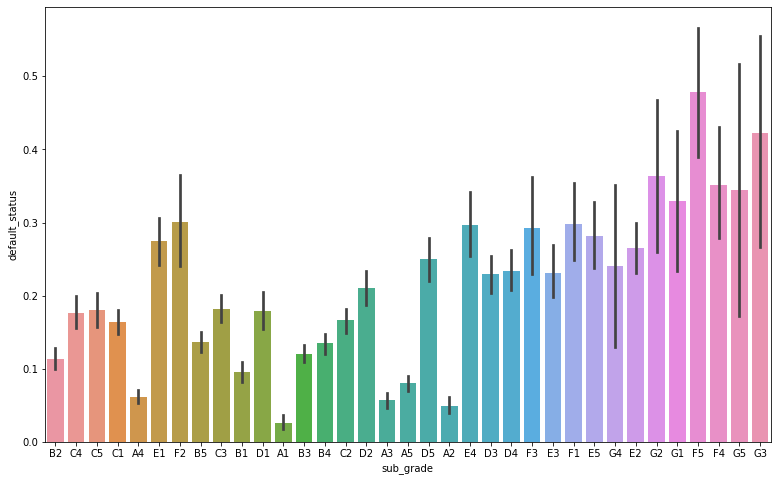

In [34]:
#plt_uni("sub_grade")
plt.figure(figsize=[13,8])
sns.barplot(data=df_loan, x="sub_grade", y="default_status")
plt.show()

### 'Higher the Sub Grade of the Loan , Higher is the risk of becoming defaulter'; In G grade G3 sub_grade has highest defaulter ratio

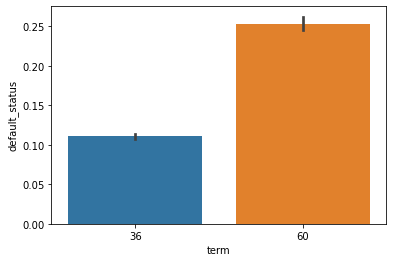

In [35]:
plt_uni("term")

###  'Higher the Term of the Loan , Higher is the risk of becoming defaulter'

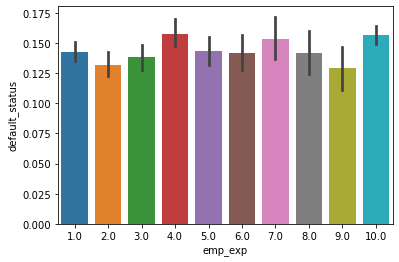

In [196]:
plt_uni("emp_exp")

### Employee Experience Columns does not really have a proper Implication over defaulter's ratio

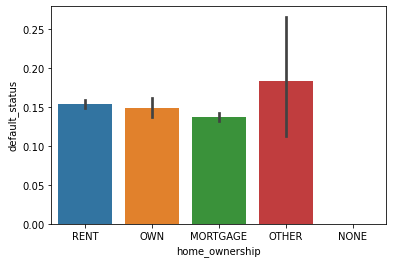

In [197]:
plt_uni("home_ownership")

#### The Home_ownership column value OTHER has Highest defaulter's ratio

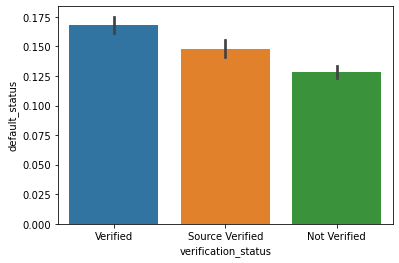

In [198]:
plt_uni("verification_status")

#### Suprisingly Verified Status Loans have higher Default Rate

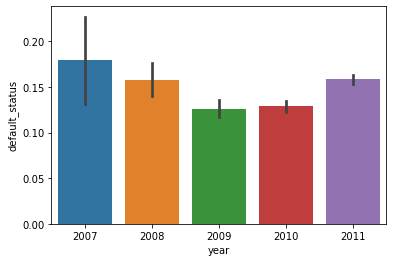

In [199]:
plt_uni("year")

#### The year show hammock like pattern on the default rate

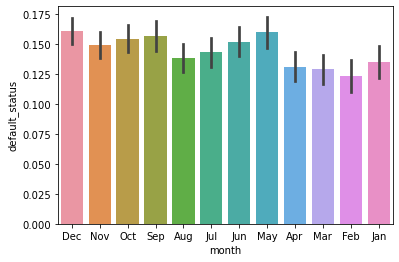

In [200]:
plt_uni("month")

#### Most number of defaulters are present in Dec month issued loans , followed by may , june ,september and october

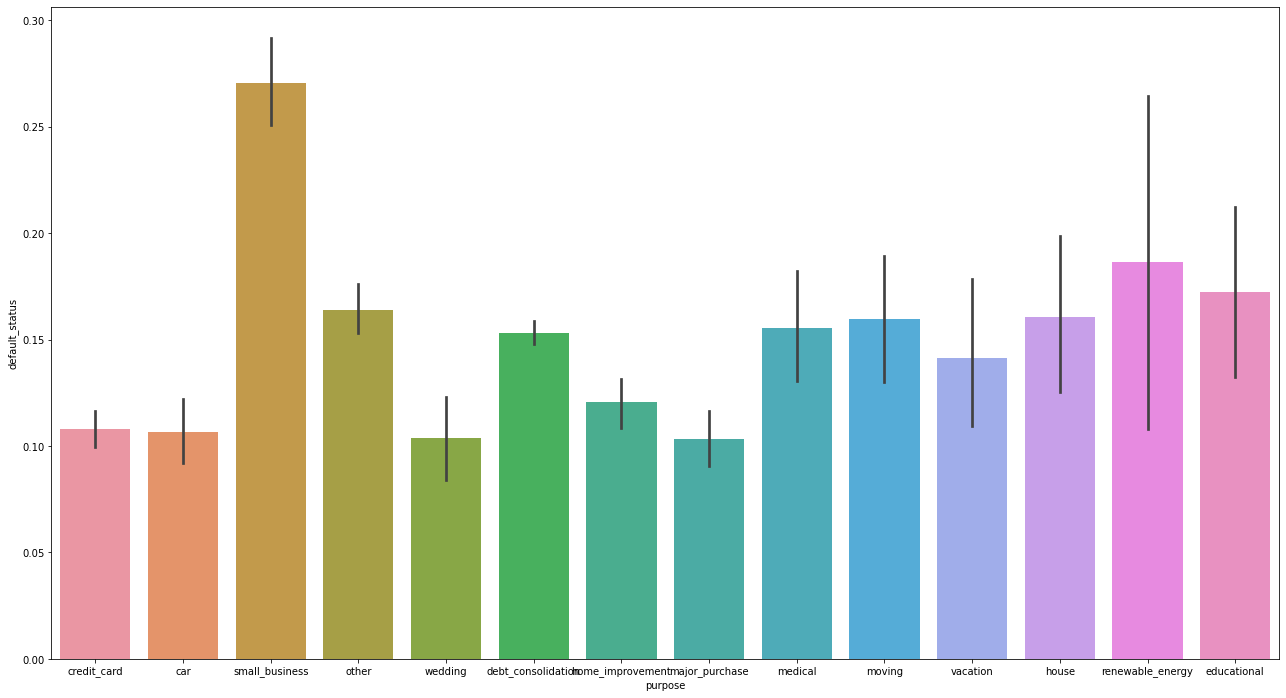

In [202]:
plt.figure(figsize=[22,12])
sns.barplot(data=df_loan, x="purpose", y="default_status")
plt.show()

In [390]:
(df_loan.groupby('purpose')['default_status'].mean())*100

purpose
car                   10.673783
credit_card           10.781778
debt_consolidation    15.325395
educational           17.230769
home_improvement      12.069565
house                 16.076294
major_purchase        10.325581
medical               15.565345
moving                15.972222
other                 16.377749
renewable_energy      18.627451
small_business        27.080958
vacation              14.133333
wedding               10.367171
Name: default_status, dtype: float64

In [204]:
(df_loan.groupby('purpose')['default_status']).value_counts().unstack()

default_status,0,1
purpose,,
car,1339,160
credit_card,4485,542
debt_consolidation,15288,2767
educational,269,56
home_improvement,2528,347
house,308,59
major_purchase,1928,222
medical,575,106
moving,484,92


#### 'Debt_consolidation', 'Credit_card', 'Home_improvement', 'Other', 'Major_purchase'  cover up to 80% of loans

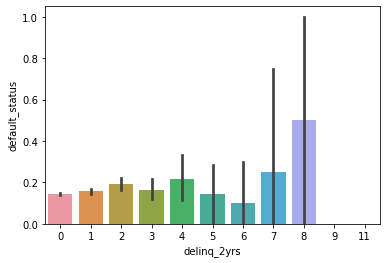

In [206]:
plt_uni("delinq_2yrs")

#### Higher the number of  Delinq ,higher the Default rate, but there arent any customers under 9 and 11 buckets

# Segmented Univariate

#### Binning these variables so as to get better insights if we have simpler segments of the following continuous variables

## Note
#### There are a few outliers in the data for various important columns, but we still needed those data points as they are also important from businness standpoint, so while performing binning below, we merged those outliers as well in the max valueing of bins.

In [36]:
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
df_loan['annual_inc_range'] = pd.cut(df_loan['annual_inc'], bins, labels=bucket_l)

In [37]:
(df_loan.groupby('annual_inc_range')['loan_number'].sum()/sum(df_loan['loan_number']))*100

annual_inc_range
0-25000          6.610156
25000-50000     33.281489
50000-75000     30.246002
75000-100000    15.654405
100000+         14.171657
Name: loan_number, dtype: float64

In [38]:
def plt_su(su_var):
    plt.figure(figsize=[12,8])
    sns.barplot(data=df_loan, x=su_var, y="default_status")
    plt.show()

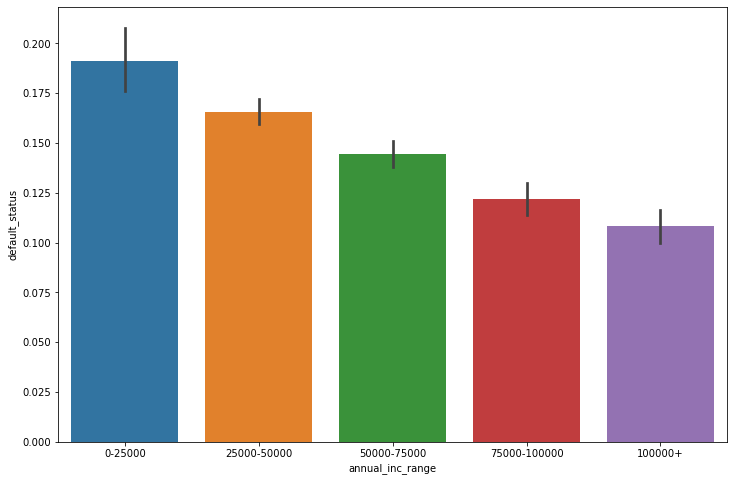

In [39]:
plt_su("annual_inc_range")

#### Lower the Annual Income range of person, higher the risk of falling into defaulter state

In [40]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
df_loan['loan_amnt_range'] = pd.cut(df_loan['loan_amnt'], bins, labels=bucket_l)

In [41]:
(df_loan.groupby('loan_amnt_range')['loan_number'].sum()/sum(df_loan['loan_number']))*100

loan_amnt_range
0-5000         24.553490
5000-10000     33.185577
10000-15000    19.916012
15000-20000    11.273557
20000-25000     7.351531
25000+          3.719833
Name: loan_number, dtype: float64

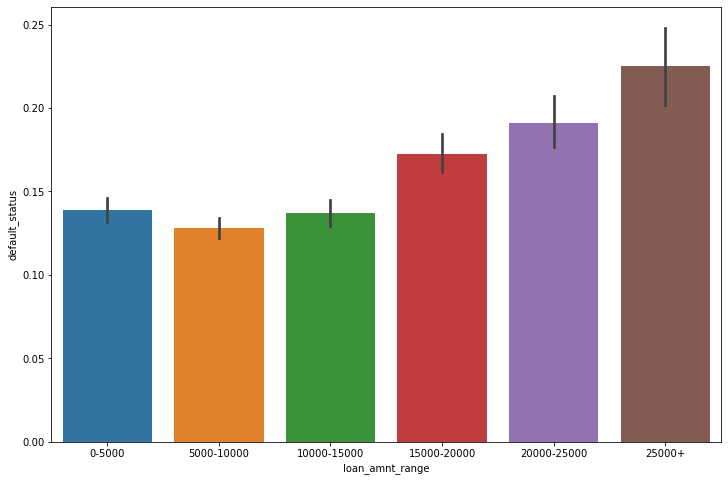

In [42]:
plt_su("loan_amnt_range")

#### Higher the Loan amount of person, higher the risk of falling into defaulter state

In [91]:
max(df_loan["dti"])

29.99

In [44]:
bins = [0.0, 10.0, 20.0,30.0]
bucket_l = ['0-10', '10-20', '20-30']
df_loan['dti_range'] = pd.cut(df_loan['dti'], bins, labels=bucket_l)

In [90]:
(df_loan.groupby('dti_range')['default_status'].mean())*100

dti_range
0-10     12.557811
10-20    15.134754
20-30    16.733787
Name: default_status, dtype: float64

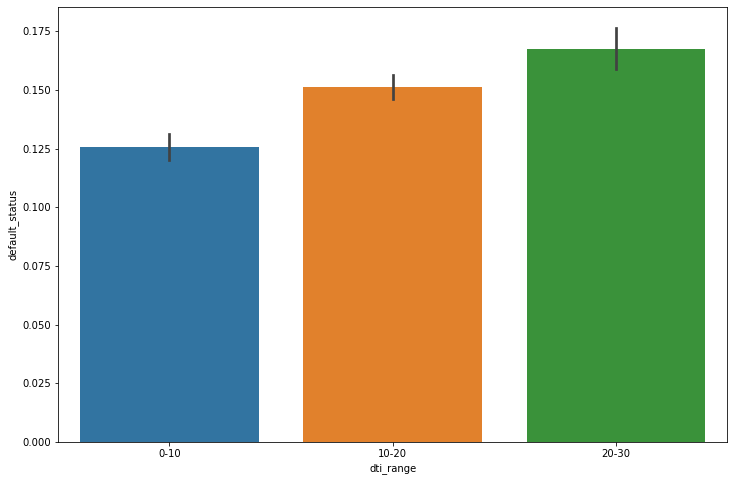

In [46]:
plt_su("dti_range")

#### higher the dti range of person, higher the risk of falling into defaulter state

In [47]:
min(df_loan['int_rate'])

5.42

In [48]:
bins = [5,10,15, 20,25]
bucket_l = ['5-10', '10-15', '15-20','20-25']
df_loan['int_rate_range'] = pd.cut(df_loan['int_rate'], bins, labels=bucket_l)

In [49]:
(df_loan.groupby('int_rate_range')['loan_number'].sum()/sum(df_loan['loan_number']))*100

int_rate_range
5-10     31.925759
10-15    47.346865
15-20    18.731368
20-25     1.996008
Name: loan_number, dtype: float64

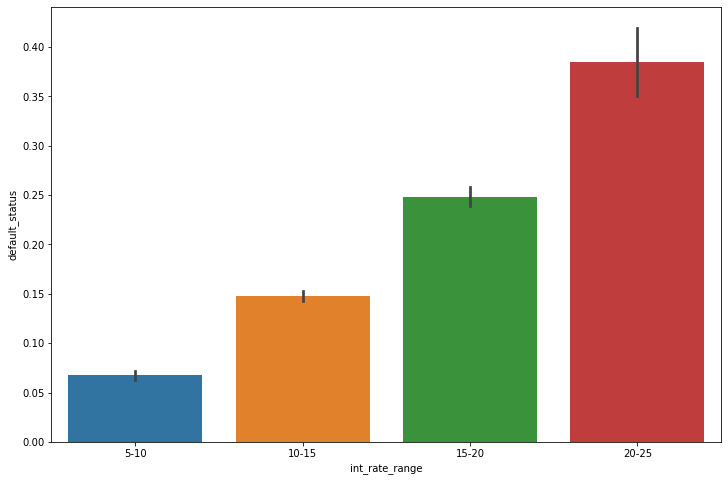

In [50]:
plt_su("int_rate_range")

#### Higher the Interest rate for the loan of person, higher the risk of falling into defaulter state

In [51]:
(df_loan.funded_amnt_inv.mean())

10222.481123435355

In [52]:
max(df_loan['funded_amnt_inv'])

35000.0

In [53]:
min(df_loan['funded_amnt_inv'])

0.0

In [54]:
bins = [0, 5000, 10000, 15000, 20000, 35000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000+']
df_loan['funded_amnt_inv_range'] = pd.cut(df_loan['funded_amnt_inv'], bins, labels=bucket_l)

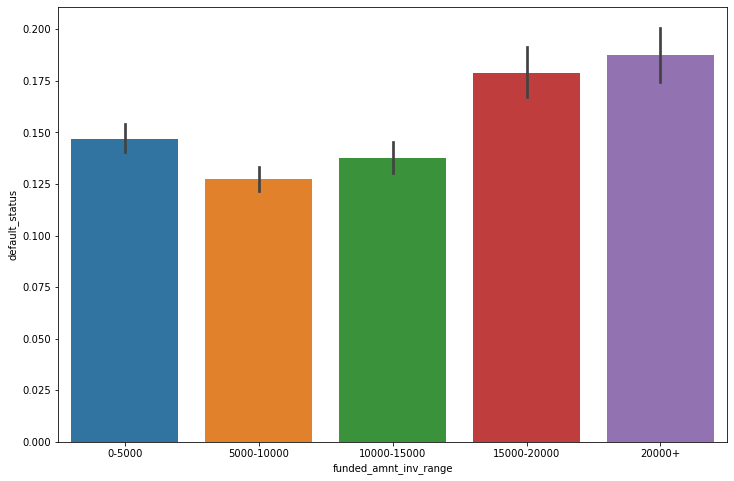

In [55]:
plt_su("funded_amnt_inv_range")

#### Funded amount by Investors is similar to that of Loan amount in terms of trend, so higher the range of funded-amnt_inv, higher the risk of falling into defaulter state

In [56]:
max(df_loan['open_acc'])

44

In [57]:
min(df_loan['open_acc'])

2

In [58]:
bins = [0,5,10,15,20,25,30,45]
bucket_l = ['0-5','5-10', '10-15', '15-20','20-25','25-30','30+']
df_loan['open_acc_range'] = pd.cut(df_loan['open_acc'], bins, labels=bucket_l)

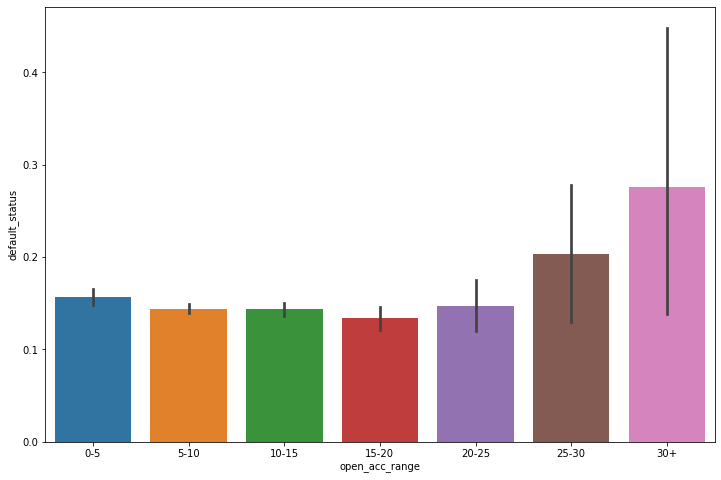

In [59]:
plt_su("open_acc_range")

#### Higher the open accounts of person, higher the risk of falling into defaulter state

In [60]:
max(df_loan['installment'])

1305.19

In [61]:
min(df_loan['installment'])

15.69

In [62]:
bins = [10,200,400,600, 800,1400]
bucket_l = ['10-200','200-400', '400-600', '600-800','800-1400']
df_loan['installment_range'] = pd.cut(df_loan['installment'], bins, labels=bucket_l)

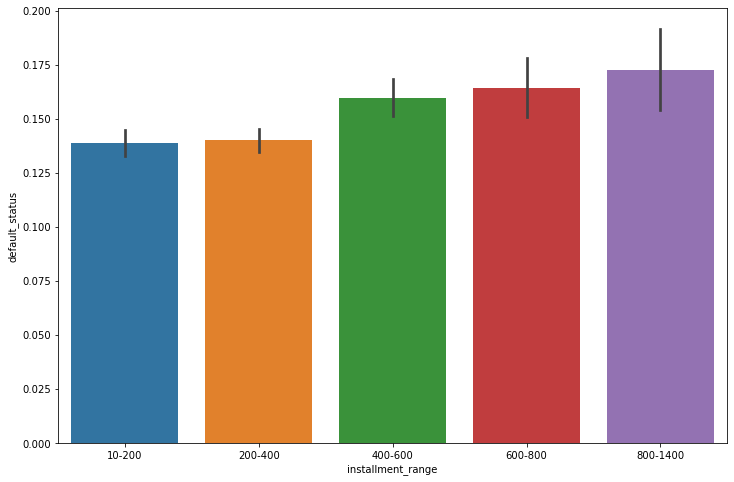

In [63]:
plt_su("installment_range")

#### Higher the installment amount for a given loan, higher the risk of falling into defaulter state

In [64]:
(df_loan.groupby('installment_range')['default_status'].mean())*100

installment_range
10-200      13.867217
200-400     13.996742
400-600     15.968307
600-800     16.420174
800-1400    17.250159
Name: default_status, dtype: float64

# Bivariate Analysis

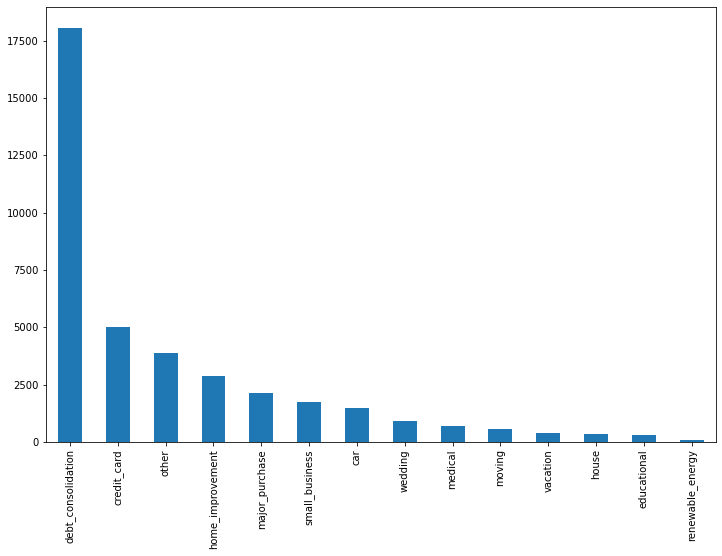

In [65]:
plt.figure(figsize=[12,8])
df_loan.purpose.value_counts().plot.bar()

In [66]:
df_loan.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

### 'Debt_consolidation','Credit_card','Home_improvement','Other','Major_purchase' cover upto 80% of loan purposes. Analysing Based on the purpose

In [67]:
bivardf= df_loan[df_loan['purpose'].isin(['debt_consolidation','credit_card','home_improvement',
                                          'other','major_purchase'])]

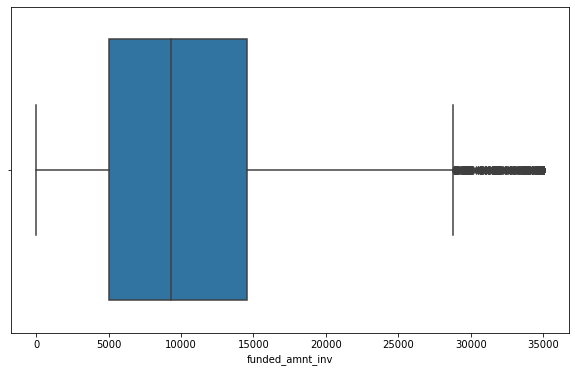

In [68]:
plt.figure(figsize=[10,6])
sns.boxplot( x='funded_amnt_inv', data=bivardf)

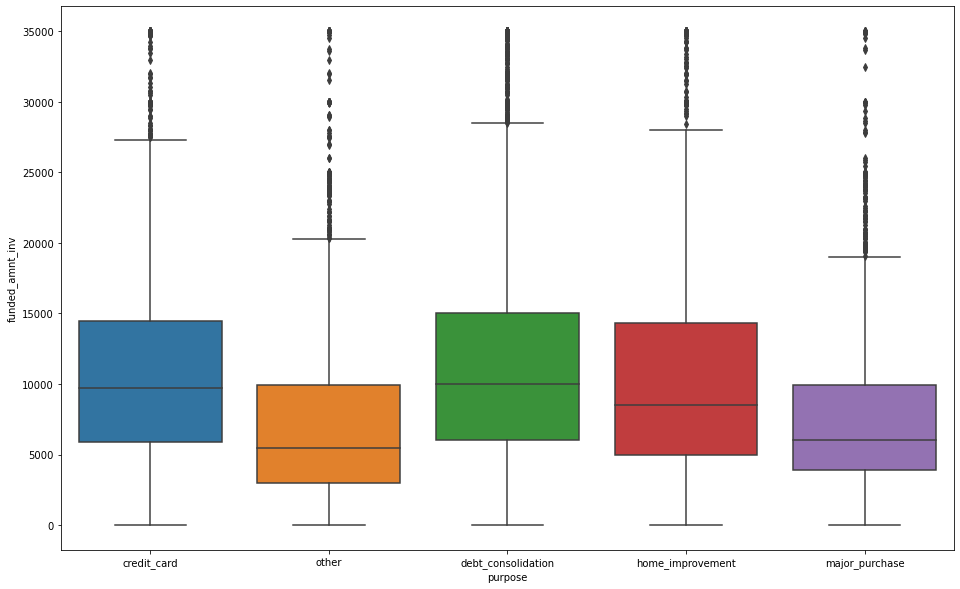

In [69]:
plt.figure(figsize=[16,10])
sns.boxplot( y='funded_amnt_inv', x='purpose', data=bivardf)

### We are considering the above Outliers, as they doesnt impact the analysis and considering them gives us more insights on the default rate of  higher income and high_loan Customers

In [70]:
def plotting_Bivar(x):
    plt.figure(figsize=[16,10])
    sns.barplot(x=x, y='default_status', hue='purpose', data=bivardf)
    plt.title("Default ratio wrt "+ x + " feature for purpose in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

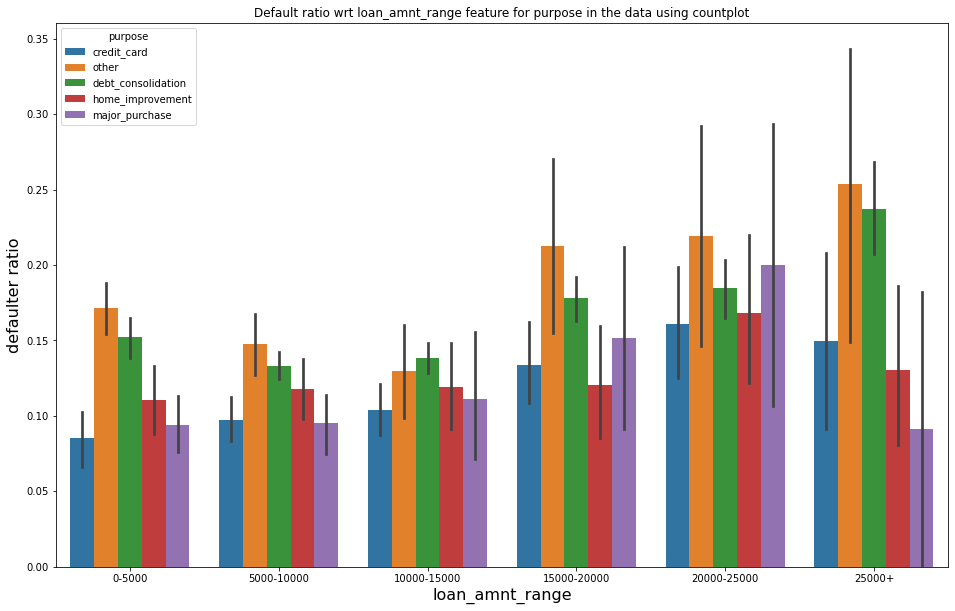

In [71]:
plotting_Bivar('loan_amnt_range')

 #### loan_amnt_range wrt purpose , defaulter ratio increases with increase of loan amount

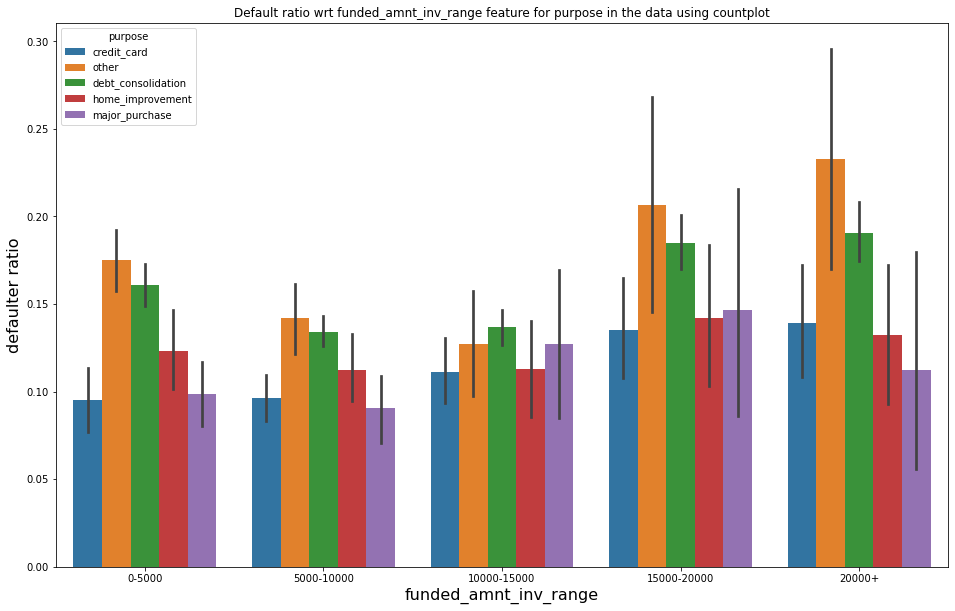

In [72]:
plotting_Bivar('funded_amnt_inv_range')

 #### funded_amnt_inv_range with purpose , defaulter ratio increases with increase of loan amount

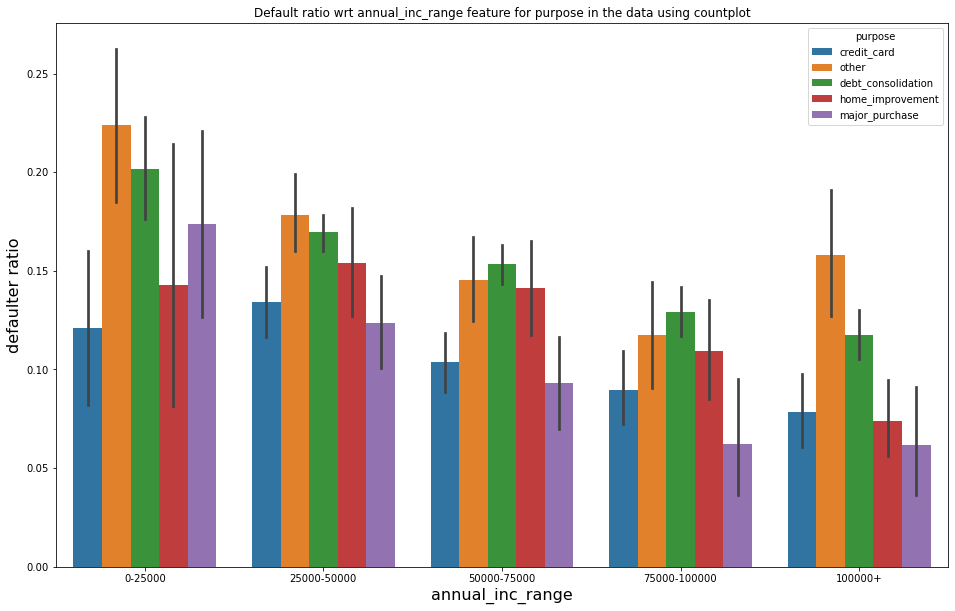

In [73]:
plotting_Bivar('annual_inc_range')

 #### annual_inc_range with purpose ,defaulter ratio is highest for low income ranges

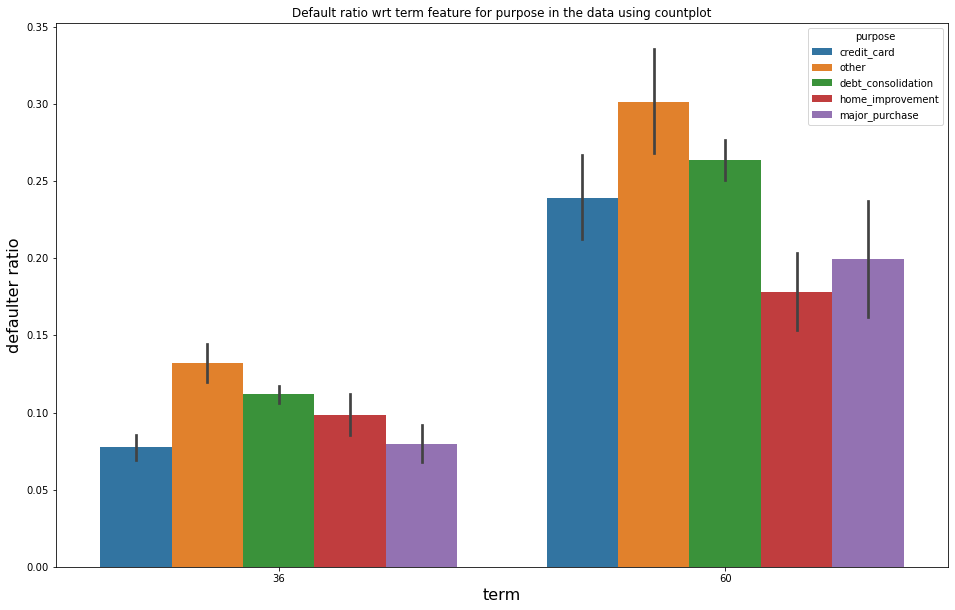

In [74]:
plotting_Bivar('term')

 #### Term with purpose , defaulter ratio increases with increase of term period

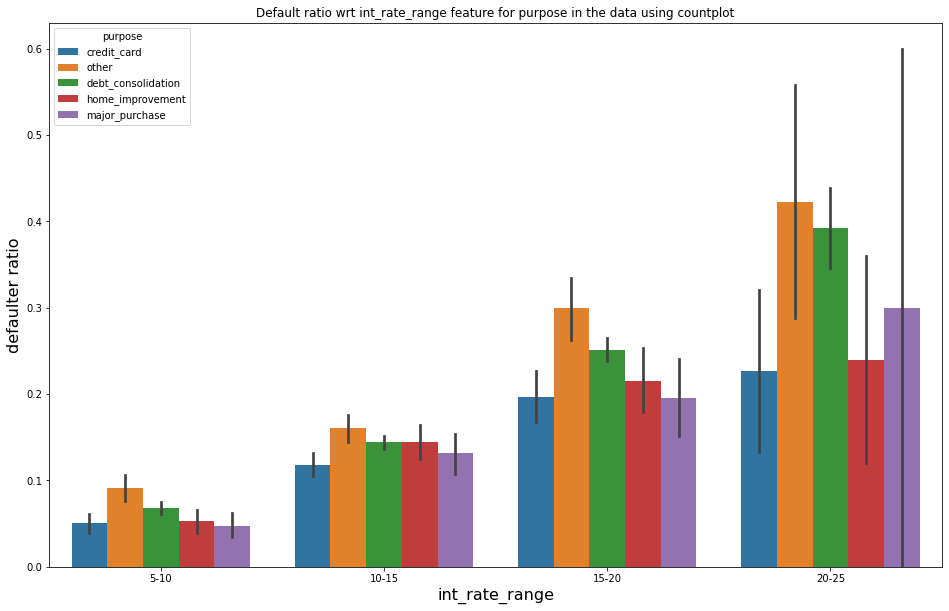

In [75]:
plotting_Bivar('int_rate_range')

 #### interest range wrt purpose , we can observe the upward trend for all the purposes , defaulter ratio increases with increase of interest rate on given loan.

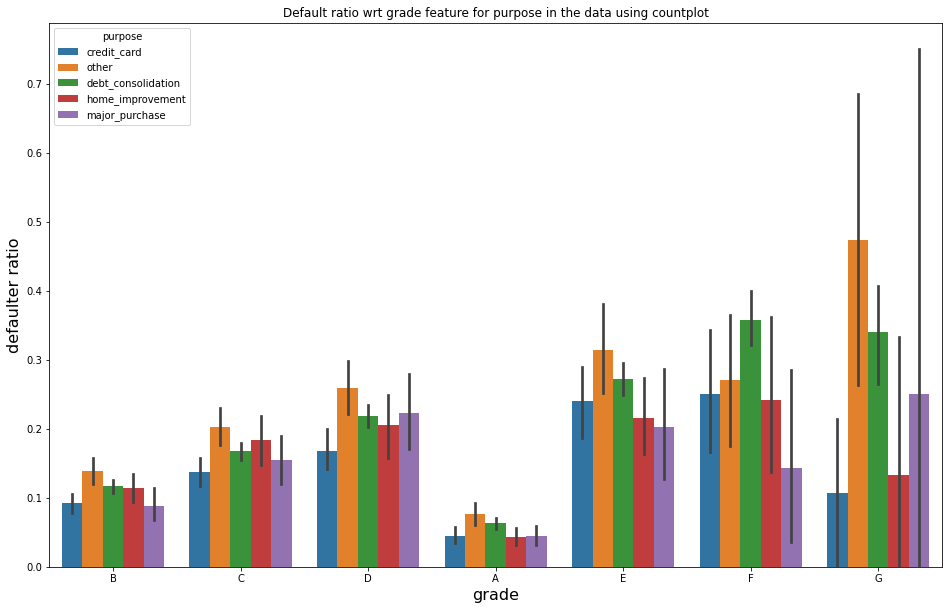

In [76]:
plotting_Bivar('grade')

 #### Grade with purpose, defaulter ratio increases with increase in grade level

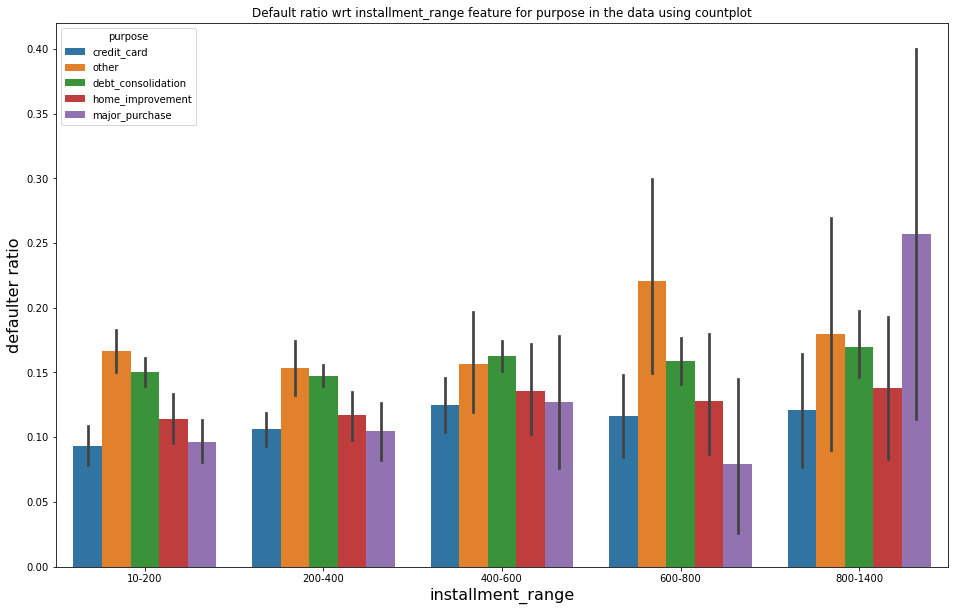

In [77]:
plotting_Bivar('installment_range')

 #### installment_range with purpose ,defaulter ratio increases with increase of installment amounts of loan.

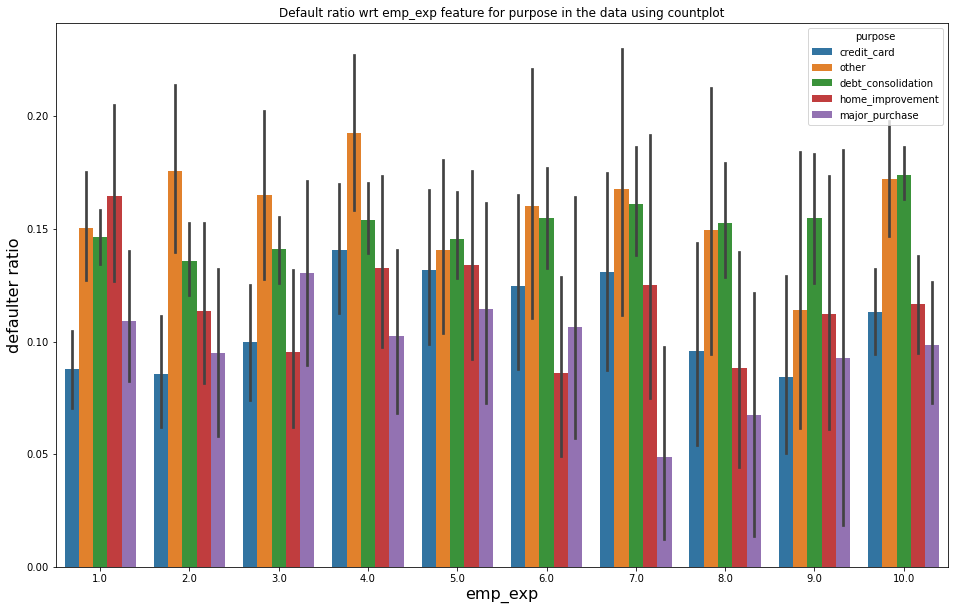

In [78]:
plotting_Bivar('emp_exp')

 #### Emp_exp with purpose, nothing much can be inferred on this , as the default ratio is almost similar.

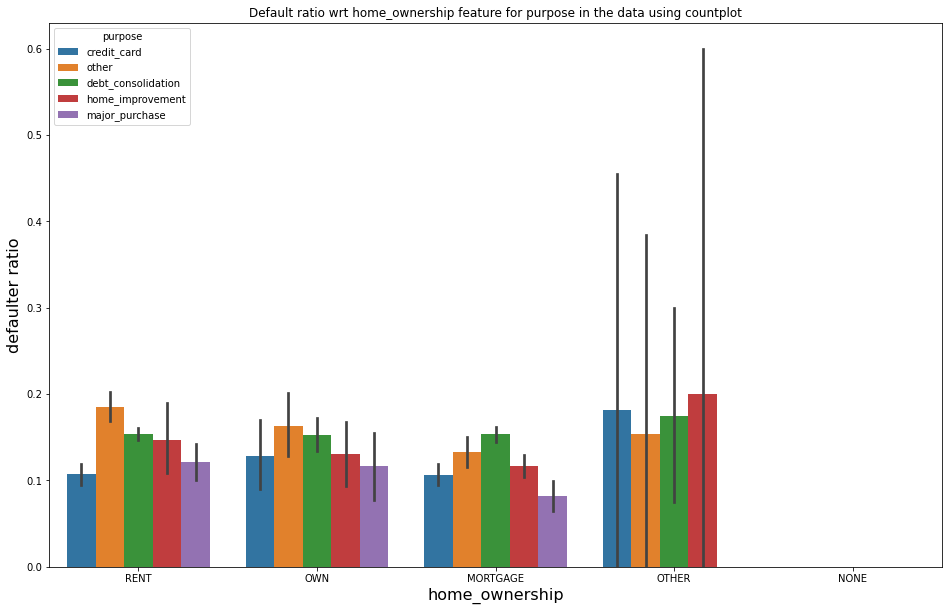

In [79]:
plotting_Bivar('home_ownership')

 #### Home Ownership ,OTHER category ownerships HAVE higher defaulter rate.

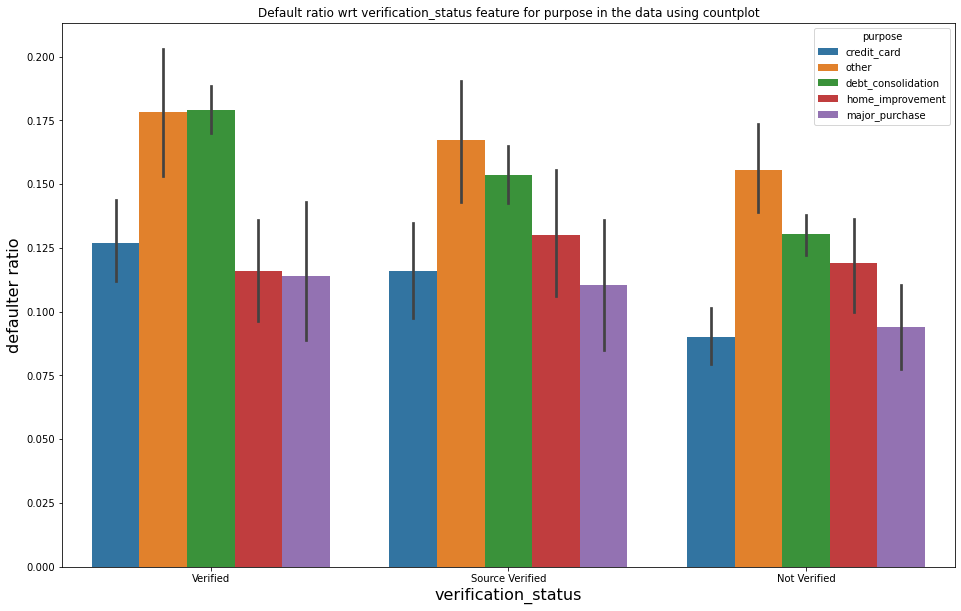

In [80]:
plotting_Bivar('verification_status')

 #### Verification , verified loans have higher defaulter rate

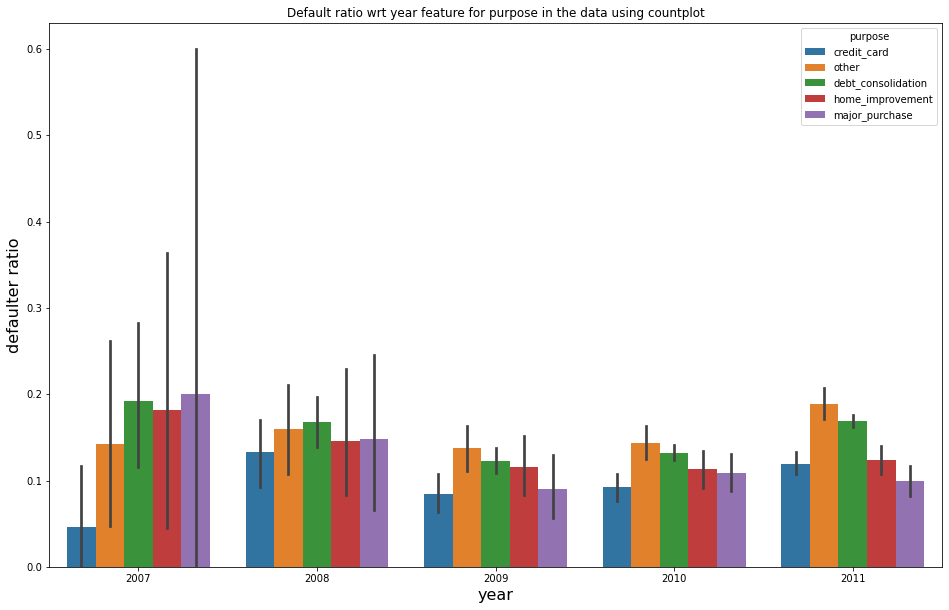

In [82]:
plotting_Bivar('year')

 #### Year, have a Hammock form of graph on Default rate

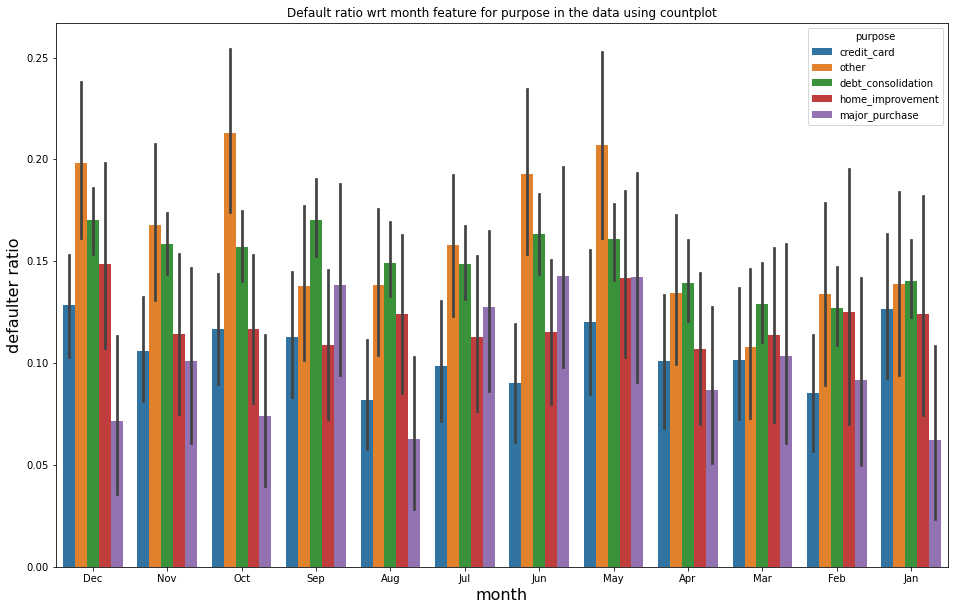

In [83]:
plotting_Bivar('month')

 #### Month with purpose ,no proper inference

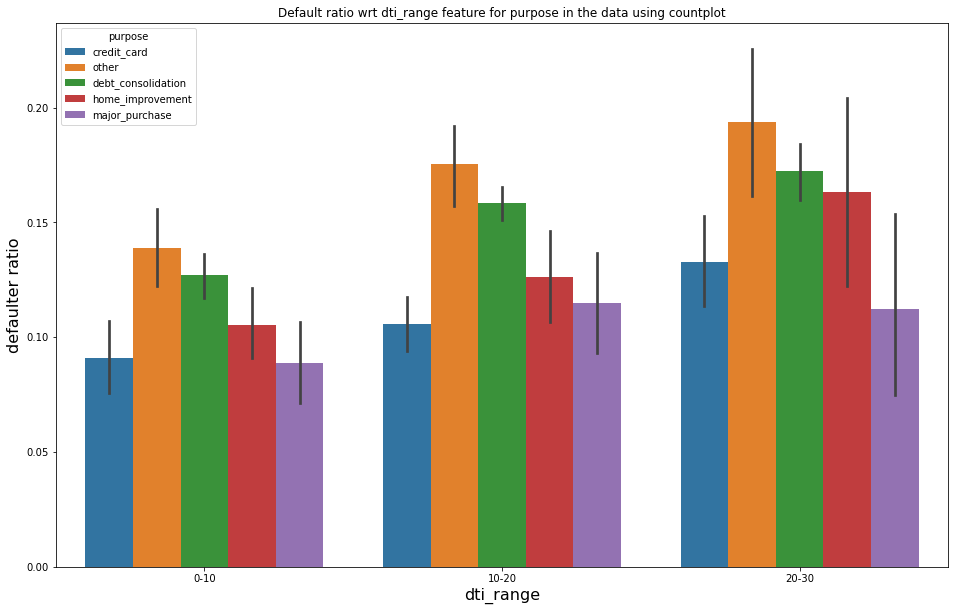

In [84]:
plotting_Bivar('dti_range')

 #### Dti_range , defaulter ratio increases with increase of dti ratio of loan.

In [85]:
(df_loan.groupby('annual_inc_range')['default_status'].mean())*100

annual_inc_range
0-25000         19.137255
25000-50000     16.551133
50000-75000     14.449777
75000-100000    12.187448
100000+         10.810316
Name: default_status, dtype: float64

In [134]:
def diff_rate(cat_var):
    default_rates = (df_loan.groupby(cat_var).default_status.mean().sort_values(ascending=False))*100
    return (max(default_rates) - min(default_rates))

diff = diff_rate('annual_inc_range')
print(diff)

8.326938457841523


In [135]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   member_id              38577 non-null  int64   
 1   loan_amnt              38577 non-null  int64   
 2   funded_amnt            38577 non-null  int64   
 3   funded_amnt_inv        38577 non-null  float64 
 4   term                   38577 non-null  int64   
 5   int_rate               38577 non-null  float64 
 6   installment            38577 non-null  float64 
 7   grade                  38577 non-null  object  
 8   sub_grade              38577 non-null  object  
 9   emp_length             38577 non-null  object  
 10  home_ownership         38577 non-null  object  
 11  annual_inc             38577 non-null  float64 
 12  verification_status    38577 non-null  object  
 13  issue_d                38577 non-null  object  
 14  loan_status            38577 non-null 

In [137]:
dftemp = df_loan.loc[:,df_loan.dtypes == ('category')]

In [138]:
dftemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   annual_inc_range       38563 non-null  category
 1   loan_amnt_range        38577 non-null  category
 2   dti_range              38399 non-null  category
 3   int_rate_range         38577 non-null  category
 4   funded_amnt_inv_range  38448 non-null  category
 5   open_acc_range         38577 non-null  category
 6   installment_range      38577 non-null  category
dtypes: category(7)
memory usage: 1.8 MB


In [140]:
d = {key: diff_rate(key) for key in dftemp.columns}
d

{'annual_inc_range': 8.326938457841523,
 'loan_amnt_range': 9.68258988278726,
 'dti_range': 4.175975576367353,
 'int_rate_range': 31.70235740225997,
 'funded_amnt_inv_range': 5.986290820369364,
 'open_acc_range': 14.181572315446555,
 'installment_range': 3.382941756307215}

#### The above dictionary contains the increment  values on the categorical range variables

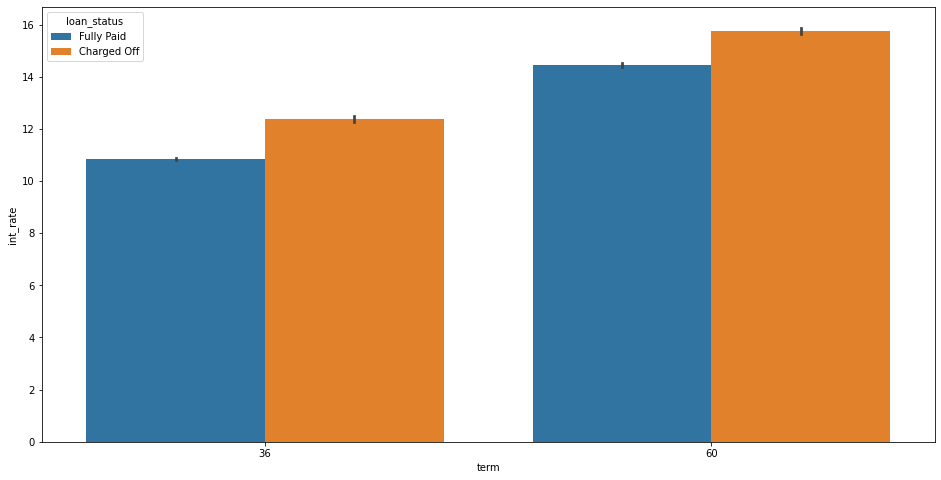

In [142]:
plt.figure(figsize=(16,8))
sns.barplot(x="term", y="int_rate", data=df_loan, hue='loan_status', order=sorted(df_loan['term'].unique()))
plt.show()

#### When compared with the fully paid customers, we can see the defaulter distribution is higher at higher and higher term

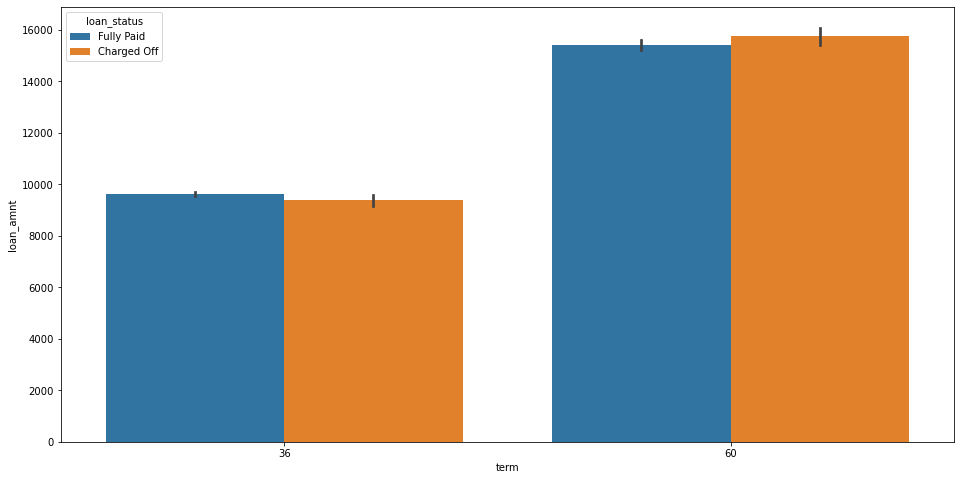

In [146]:
plt.figure(figsize=(16,8))
sns.barplot(x="term", y="loan_amnt", data=df_loan, hue='loan_status', order=sorted(df_loan['term'].unique()))
plt.show()

#### We can see the defaulter distribution is higher with higher term and higher loan amount

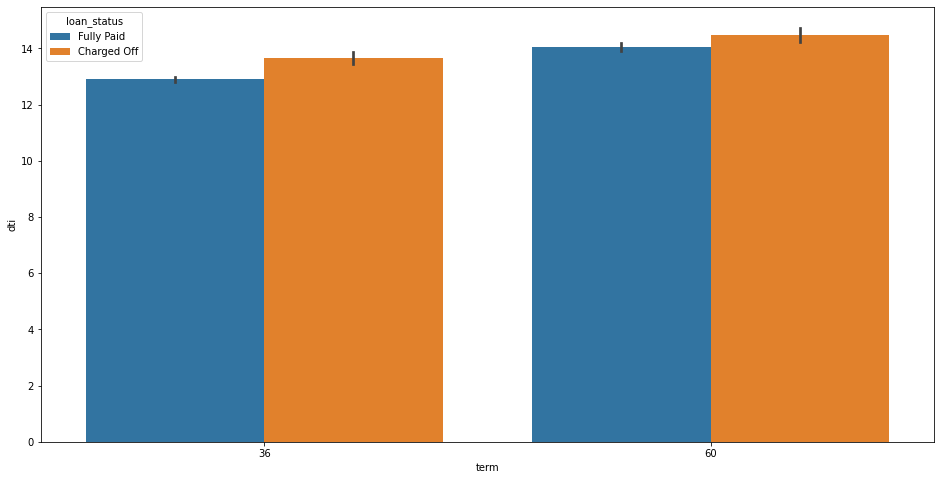

In [144]:
plt.figure(figsize=(16,8))
sns.barplot(x="term", y="dti", data=df_loan, hue='loan_status', order=sorted(df_loan['term'].unique()))
plt.show()

#### Both distributions look almost similar,with little higher in the 60 Months Term

# Multivariate Analysis

In [330]:
res=pd.pivot_table(data=bivardf,index="purpose",columns=["loan_amnt_range",'int_rate_range'],
                   values="default_status",aggfunc=np.mean)

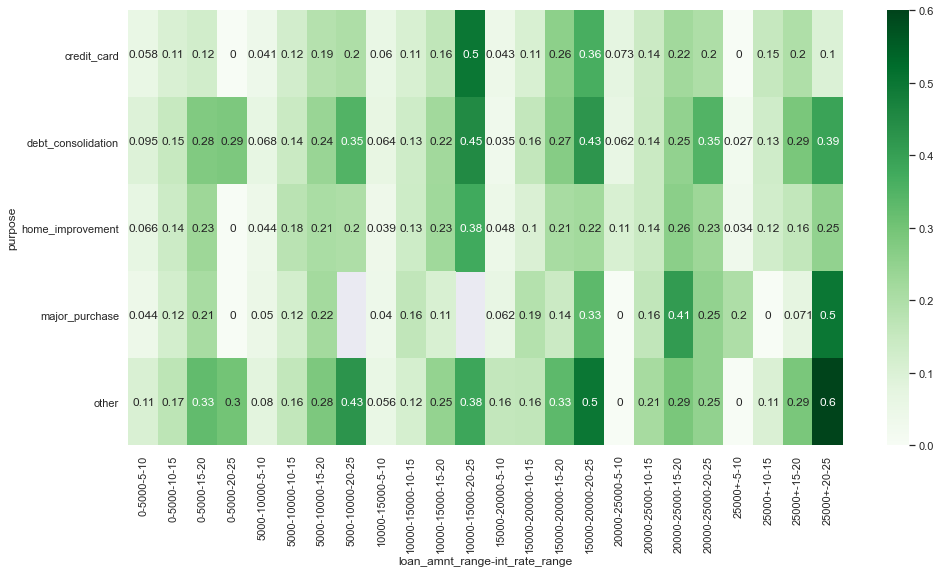

In [331]:
plt.figure(figsize=(16,8))
sns.heatmap(res,cmap = "Greens", annot=True)
plt.show()

#### Other loan purpose with loan_amnt - range 20000+ and 20-25 interest range have the highest defaulter correlation and followed by other combinations